In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed_cases = pd.read_csv('D:\\machine learning\\corona_detection\\time_series_covid_19_confirmed.csv')

In [3]:
death_reported = pd.read_csv('D:\\machine learning\\corona_detection\\time_series_covid_19_deaths.csv')

In [4]:
recovered_cases = pd.read_csv('D:\\machine learning\\corona_detection\\time_series_covid_19_recovered.csv')

In [5]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


In [6]:
cols = confirmed_cases.keys()

In [7]:
confirmed= confirmed_cases.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,0,0,0,0,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,0,0,0,0,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,0,0,0,0,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,0,0,0,0,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,0,0,0,0,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,8,8,14,16,16,16
263,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,6,6,7,10,10
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3,3


In [8]:
deaths=death_reported.loc[:,cols[4]:cols[-1]]

In [9]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [10]:
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate = []
total_recovered = []
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [11]:
confirmed_sum

3506729

In [12]:
death_sum

247470

In [13]:
recovered_sum

1125236

In [14]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_death = np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [15]:
days_in_future = 10
future_forecast = np.array([i for i  in range(len(dates)+ days_in_future)]).reshape(-1,1)
adjusted_days=future_forecast[:-10]

In [16]:
import time
import datetime
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
 
    future_forecast_dates.append((start_date + datetime.timedelta(days= i)).strftime('%m/%d/%Y'))
    


In [17]:
latest_confirmed = confirmed_cases[dates[-1]]
lateset_death = death_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [19]:
from sklearn.model_selection import train_test_split
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed= train_test_split(days_since_1_22,world_cases, test_size= 0.15, shuffle= False)

In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]
gamma= [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}
svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True, n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.6s finished
D:\downloads\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [21]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.01, 'C': 1}

In [22]:
svm_confirmed = svm_search.best_estimator_
svm_pred= svm_confirmed.predict(future_forecast)

In [23]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

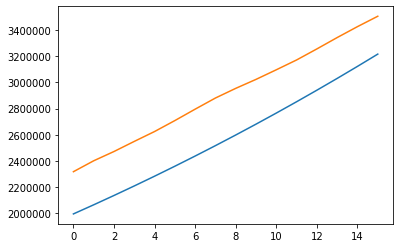

In [24]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)


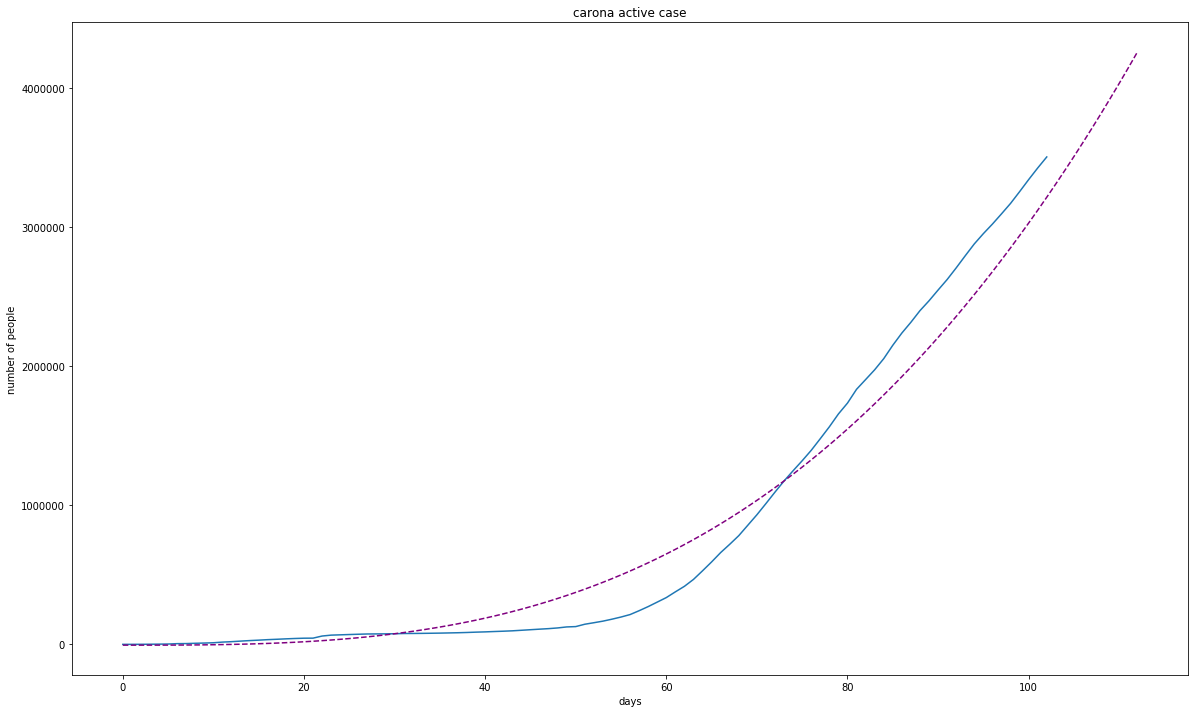

In [26]:
plt.figure(figsize=(20,12))
plt.title('carona active case')
plt.xlabel('days')
plt.ylabel('number of people')
plt.plot(world_cases)
plt.plot(future_forecast,svm_pred,linestyle = 'dashed', color='purple')
plt.show()

In [27]:
print('SVM future predictions :')
set((zip(future_forecast_dates[-10:],svm_pred[-10:])))

SVM future predictions :


{('05/04/2020', 3312771.901790142),
 ('05/05/2020', 3410352.0682706833),
 ('05/06/2020', 3509826.9363076687),
 ('05/07/2020', 3611214.724183202),
 ('05/08/2020', 3714533.650184989),
 ('05/09/2020', 3819801.932593107),
 ('05/10/2020', 3927037.789690852),
 ('05/11/2020', 4036259.439767599),
 ('05/12/2020', 4147485.101103425),
 ('05/13/2020', 4260732.991982937)}

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_confirmed,y_train_confirmed)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train_confirmed)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train_confirmed)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

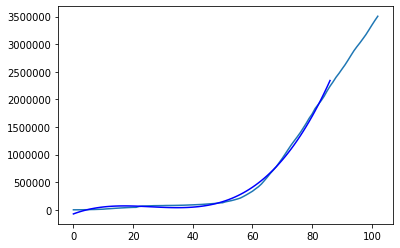

In [29]:
plt.plot(world_cases)
plt.plot(X_train_confirmed,lin_reg_2.predict(X_poly),color= 'blue')

plt.show()




In [30]:
X_pred = lin_reg_2.predict(poly_reg.fit_transform(future_forecast))

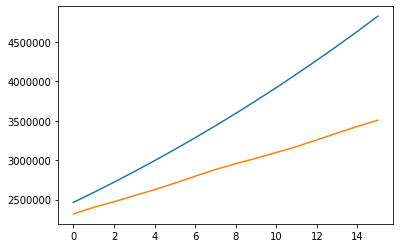

In [31]:
poly_test_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test_confirmed))
plt.plot(poly_test_pred)
plt.plot(y_test_confirmed)


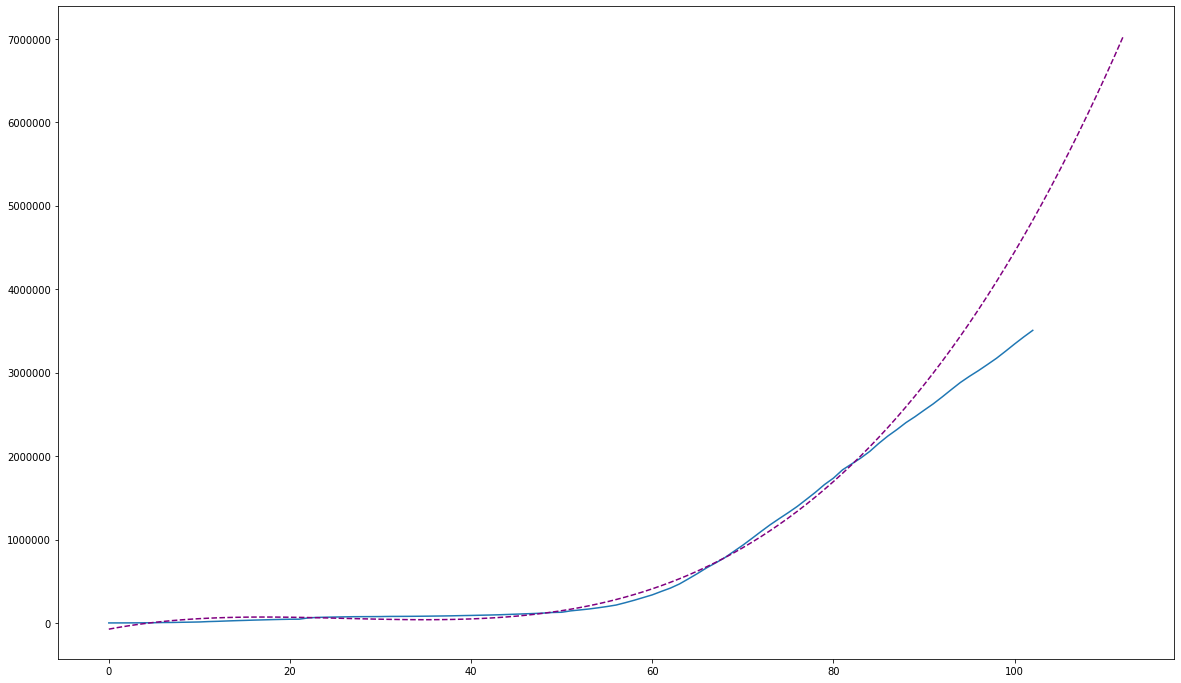

In [32]:
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.plot(future_forecast,X_pred,linestyle = 'dashed', color='purple')
plt.show()

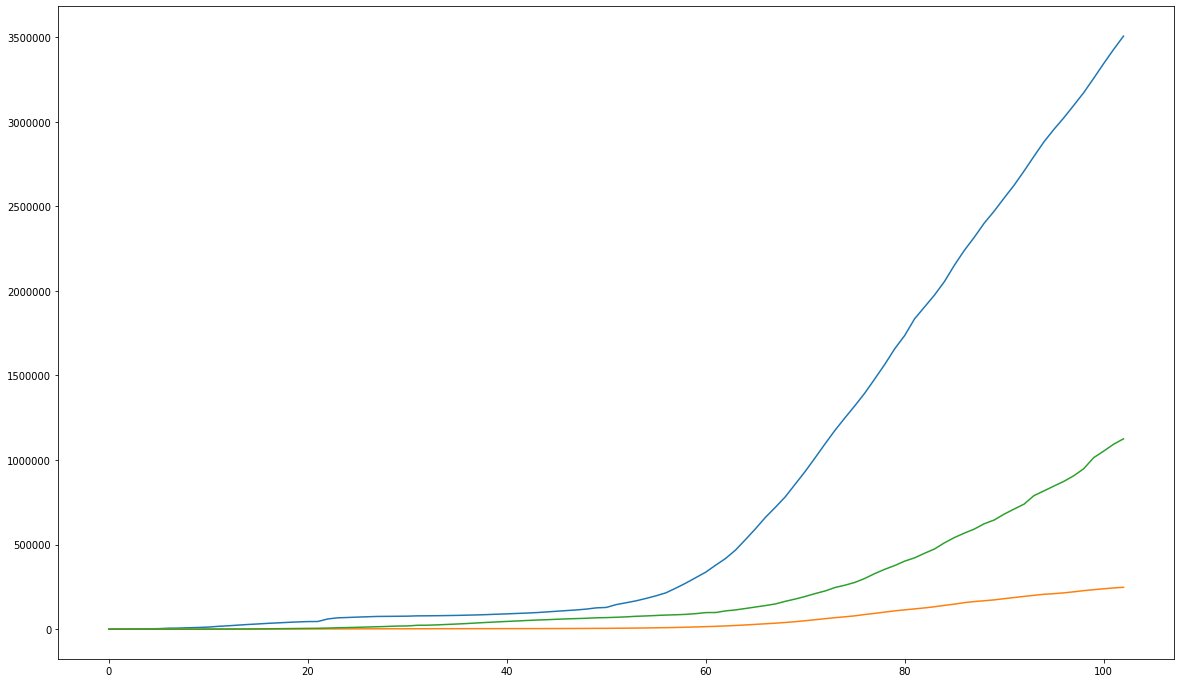

In [33]:
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.plot(total_deaths)
plt.plot(total_recovered)
plt.show()


In [34]:
print('Polynomial Regression future predictions :')
print(future_forecast_dates[-10:],X_pred[-10:])

Polynomial Regression future predictions :
['05/04/2020', '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020', '05/10/2020', '05/11/2020', '05/12/2020', '05/13/2020'] [[5022251.04460738]
 [5223748.4549017 ]
 [5430548.36877335]
 [5642718.75925996]
 [5860327.59939918]
 [6083442.86222862]
 [6312132.52078594]
 [6546464.54810876]
 [6786506.91723471]
 [7032327.60120144]]
